#  NPoS Economics - Eray Sabancilar
## 1. An Agent Based Stochastic Microeconomic Model: V1

In [ ]:
# Input parameters
# s: slot time
# e: epoch time
# T: era
# lambda_v: validator points rate
# mu_d, sigma_d: staking rate parameters
# N_v: number of validators
# N_n: number of nominators
# P_T: total payout in era T
# D: total number of dots outstanding in the beginning of the year

# Functions
# simulateEraNPoS(s,e,T,lambda_v, mu_d,N_v,N_n,P_T,D)
# Outputs: 
# staking rate: x
#
# simulateAnnualNPoS ()
# Outputs
# To be defined.


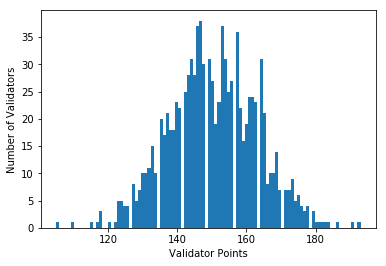

Total points


150335

Total staked dots


564785.6372849495

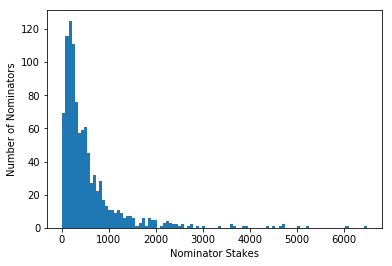

Total Dots Outstanding


1000000

Staking Rate


0.5647856372849496

Interest Rate


0.17705832690916554

Inflation Rate


0.1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Validator points parameters
# slot time 6 sec
s = 6 
# epoch time 4hrs
e = 4*60*s 
# era time 6 epochs = 24 hrs
T = 6*e 
# Validator points rate
lambda_v = 25/e 
# number of validators
N_v = 1000 

# Generating samples for c_v (homogenous Poisson random variable)
c_v = np.random.poisson(lambda_v*T, N_v)

# Distribution of validator points at the end of an era
plt.hist(c_v, 100)
plt.xlabel('Validator Points')
plt.ylabel('Number of Validators')
plt.show()

mu = np.mean(c_v)
sigma = np.std(c_v)

# Total number of points in era T
C = np.sum(c_v)
print('Total points')
display(C)

# Payout in era T
P_T = 1000 

# Payout to validator v and their nominators
P_v = (c_v/C)*P_T

# Staked dots by nominator n
# Staking Parameters
mu_d = 5.8;
sigma_d = 1;
# Number of nominators: For simplicity assume that the validators are the nominators. 
N_n = N_v;
# Generating a standard normal random variables
z = np.random.normal(0, 1, N_n)
# Generating log-normally distributed nominator stakes
d_n = np.exp(mu_d + sigma_d*z)
# Total stakes
d_tot = sum(d_n)
print('Total staked dots')
display(d_tot)

# Distribution of nominator stakes
plt.hist(d_n, 100)
plt.xlabel('Nominator Stakes')
plt.ylabel('Number of Nominators')
plt.show()

# Staking Rate
# Parameters
# Total number of dots outstanding
D = 1*10**6
print('Total Dots Outstanding')
display(D)
x = d_tot/D
print('Staking Rate')
display(x)

# Interest rate
i = (1/(x*D))*P_T
print('Interest Rate')
display(i*100)

# Inflation rate
pi = P_T/D
print('Inflation Rate')
display(pi*100)